In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as mno

import warnings
warnings.simplefilter('ignore') 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
df = pd.read_csv('zipcode_data.csv', index_col=0)
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,AveragePrice
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.00,302700.00,303800.00,304800.00,305800.00,306800.00,308100.00,309400.00,311400.00,314000.00,316400.00,318400.00,320600.00,322900.00,325300.00,327700.00,330300.00,332900.00,335800.00,339000.00,342900.00,347400.00,351800.00,355900.00,360200.00,364700.00,369200.00,373800.00,378400.00,383100.00,388100.00,393300.00,399300.00,405600.00,411800.00,417600.00,423600.00,429400.00,435000.00,440500.00,445800.00,451000.00,456500.00,462100.00,468500.00,475300.00,482100.00,488500.00,495000.00,501400.00,507800.00,514200.00,520400.00,526800.00,533400.00,540400.00,548000.00,556000.00,564000.00,572000.00,580000.00,587800.00,595400.00,602600.00,609500.00,616500.00,623600.00,631000.00,638800.00,646900.00,655100.00,663300.00,671200.00,678700.00,685600.00,692000.00,698100.00,704000.00,710400.00,716800.00,722800.00,728400.00,734000.00,739600.00,744900.00,749800.00,754200.00,758400.00,762800.00,767900.00,773700.00,779600.00,785400.00,791000.00,796500.00,802600.00,809700.00,818300.00,828900.00,841300.00,854100.00,866400.00,878200.00,890300.00,903600.00,916900.00,928700.00,938900.00,948700.00,958900.00,971500.00,987700.00,1007300.00,1028300.00,1047800.00,1064300.00,1078200.00,1090000.00,1101100.00,1113100.00,1125900.00,1137400.00,1146100.00,1150900.00,1152800.00,1153600.00,1154500.00,1156700.00,1162000.00,1168700.00,1175800.00,1184400.00,1194500.00,1203800.00,1211800.00,1218300.00,1223300.00,1226700.00,1227900.00,1226700.00,1224300.00,1219300.00,1211600.00,1204200.00,1197800.00,1190100.00,1181200.00,1170100.00,1157500.00,1145600.00,1134900.00,1124300.00,1114600.00,1103700.00,1091700.00,1080500.00,1069100.00,1054500.00,1040700.00,1032600.00,1030800.00,1032400.00,1034000.00,1034300.00,1028300.00,1022000.00,1022400.00,1025800.00,1021300.00,1015000.00,101090

In [10]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName','SizeRank', 'AveragePrice','ROI'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    #return melted.groupby('time').aggregate({'value':'mean'})
    return melted

In [23]:
melted = melt_data(df)
melted.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,AveragePrice,ROI,time,value
0,60545,7030,Hoboken,NJ,New York,Hudson,58,957777.36,5.15,1996-04-01,301600.00
1,62022,11211,New York,NY,New York,Kings,118,595167.17,11.19,1996-04-01,133200.00
2,60639,7302,Jersey City,NJ,New York,Hudson,192,596591.32,9.40,1996-04-01,137200.00
3,62027,11216,New York,NY,New York,Kings,476,572171.70,9.94,1996-04-01,146100.00
4,62033,11222,New York,NY,New York,Kings,1156,640047.55,10.54,1996-04-01,149200.00


In [24]:
melted.isnull().sum()

RegionID        0
Zipcode         0
City            0
State           0
Metro           0
CountyName      0
SizeRank        0
AveragePrice    0
ROI             0
time            0
value           0
dtype: int64

In [25]:
melted.drop(columns=['RegionID', 'Metro', 'CountyName', 'SizeRank', 'AveragePrice', 'ROI'])

,Zipcode,City,State,time,value
0,7030,Hoboken,NJ,1996-04-01,301600.00
1,11211,New York,NY,1996-04-01,133200.00
2,7302,Jersey City,NJ,1996-04-01,137200.00
3,11216,New York,NY,1996-04-01,146100.00
4,11222,New York,NY,1996-04-01,149200.00
...,...,...,...,...,...
2380,11222,New York,NY,2018-04-01,1721100.00
2381,6820,Darien,CT,2018-04-01,1388100.00
2382,7756,Neptune,NJ,2018-04-01,533700.00
2383,6068,Salisbury,CT,2018-04-01,474500.00


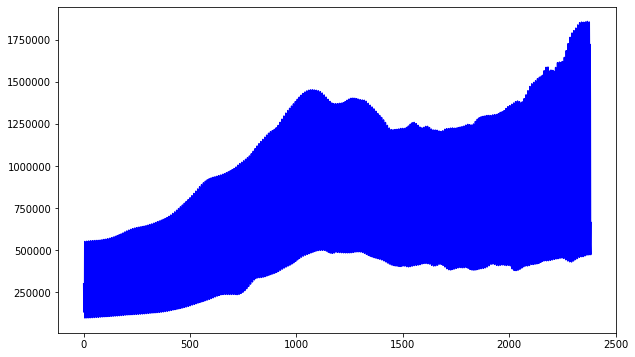

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(melted['value'], color='blue',label='Temp');

In [34]:
states = melted.groupby('State').mean()

states

,RegionID,Zipcode,SizeRank,AveragePrice,ROI,value
State,,,,,,
CT,60344.00,6560.33,11346.33,699078.49,1.45,699078.49
NJ,60660.00,7362.67,3336.33,633337.74,6.32,633337.74
NY,62027.33,11216.33,583.33,602462.14,10.56,602462.14


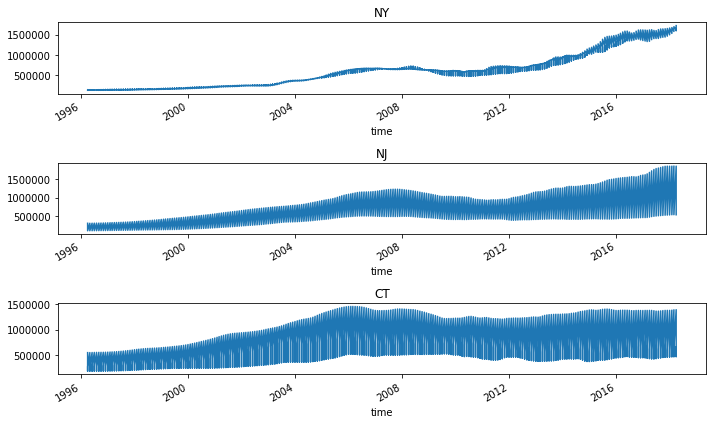

In [28]:



fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,6))
# Use ax1 to plot NY
melted[melted['State'] == 'NY'].plot(x='time', y='value', legend=False, ax=ax1)
ax1.set_title("NY")
# Use ax2 to plot NJ
melted[melted['State'] == 'NJ'].plot(x='time', y='value', legend=False, ax=ax2)
ax2.set_title("NJ")
# Use ax2 to plot CT
melted[melted['State'] == 'CT'].plot(x='time', y='value', legend=False, ax=ax3)
ax3.set_title("CT")
# If you don't do tight_layout() you'll have weird overlaps
#plt.show()
plt.tight_layout()

In [35]:
melted['time'] = pd.to_datetime(melted['time'])
melted.set_index('time', inplace=True)
melted.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,AveragePrice,ROI,value
time,,,,,,,,,,
1996-04-01,60545,7030,Hoboken,NJ,New York,Hudson,58,957777.36,5.15,301600.00
1996-04-01,62022,11211,New York,NY,New York,Kings,118,595167.17,11.19,133200.00
1996-04-01,60639,7302,Jersey City,NJ,New York,Hudson,192,596591.32,9.40,137200.00
1996-04-01,62027,11216,New York,NY,New York,Kings,476,572171.70,9.94,146100.00
1996-04-01,62033,11222,New York,NY,New York,Kings,1156,640047.55,10.54,149200.00


In [36]:
melted.to_csv('topzip_timeseries.csv')